In [ ]:
!pip -q install plotly --upgrade

     |████████████████████████████████| 15.3 MB 5.0 MB/s 


In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_credit = pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')

In [ ]:
base_credit # defaulted

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
base_credit.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##Visualização

In [ ]:
base_credit.columns.tolist()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [ ]:
np.unique(base_credit['loan_status'], return_counts=True)

(array([0, 1]), array([25473,  7108]))

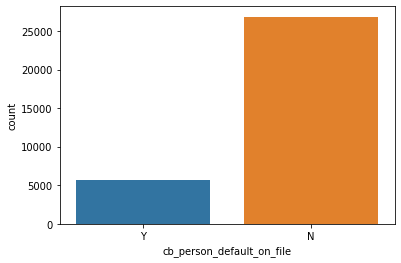

In [ ]:
sns.countplot(x=base_credit['cb_person_default_on_file']);

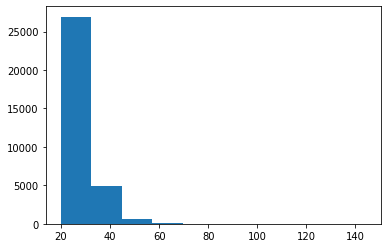

In [ ]:
plt.hist(x=base_credit['person_age']);

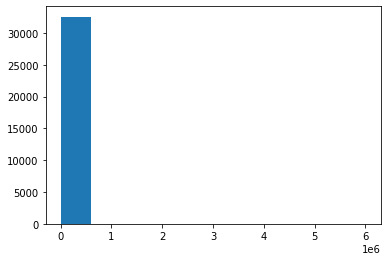

In [ ]:
plt.hist(x = base_credit['person_income']);

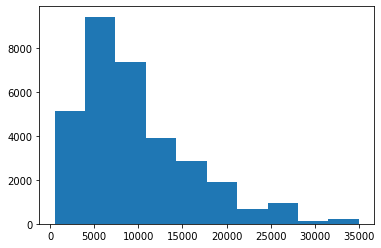

In [ ]:
plt.hist(x = base_credit['loan_amnt']);

In [ ]:
graph = ex.scatter_matrix(base_credit,dimensions=['person_age', 'person_income', 'loan_amnt'], color= 'loan_status')
graph.show()

## Tratamento de Valores inconsistentes

Valores que não condizem com valores reais, ex: uma pessoa com 150 anos


1.   Localizar Valores inconsistentes
2.   Tratar Valores



In [ ]:
#localizar valores inconsistentes
base_credit.loc[base_credit['person_age'] > 110]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
#localizar valores inconsistentes
base_credit[base_credit['person_age'] > 110]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
#Apagar Colunas com valores de erro
#apaga coluna inteira
base_credit_2=base_credit.drop('person_age',axis=1)
base_credit_2

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
#Apagar somente os valores inconsistentes
#.index fazem referencia aos numero 0,1,2,3....n, ao usar base_credit['person_age']>110].index 
#ele retorna os indices dos valroes inconsistentes 
base_credit_3 = base_credit.drop(base_credit[base_credit['person_age']>110].index)
base_credit_3

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
#ALTERNATIVA MAIS RECOMENDAVEL
#Preencher os valores inconsistentes manualmente
#Aqui vamos preencher com a media das idades


In [ ]:
base_credit['person_age'].mean()

# base_credit.mean()

27.73459992019889

In [ ]:
#calcula a media das idades sem os valores inconsistentes
mean_age = base_credit['person_age'][base_credit['person_age']<110].mean()

#substitui valores inconsistentes pela media
base_credit.loc[base_credit['person_age']>110, 'person_age'] = mean_age


## Tratamento de Valores Faltantes

Tratamento de valores que faltam no dataset

In [ ]:
base_credit.isnull()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Valores que nao estao preenchidos
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
#Valores que nao foram preenchidos em person_emp...
base_credit.loc[pd.isnull(base_credit['person_emp_length'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22.0,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24.0,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24.0,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25.0,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22.0,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38.0,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51.0,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70.0,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56.0,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [ ]:
#Valores que nao foram preenchidos em loan_iny...
base_credit.loc[pd.isnull(base_credit['loan_int_rate'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23.0,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24.0,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23.0,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24.0,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26.0,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53.0,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65.0,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54.0,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51.0,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [ ]:
 #Substitui valores que faltam pela media
#inplace altera a abse de dados

base_credit['person_emp_length'].fillna(base_credit['person_emp_length'].mean(), inplace = True)

base_credit['loan_int_rate'].fillna(base_credit['loan_int_rate'].mean(), inplace = True)

## Divisao entre previsores e classe

Objetiva-se usar dados historicos para prever se o cliente vai pagar ou nao o emprestimo

In [ ]:
X_credit = base_credit.iloc[:,[0,1,6]].values

In [ ]:
X_credit

array([[2.200e+01, 5.900e+04, 3.500e+04],
       [2.100e+01, 9.600e+03, 1.000e+03],
       [2.500e+01, 9.600e+03, 5.500e+03],
       ...,
       [6.500e+01, 7.600e+04, 3.500e+04],
       [5.600e+01, 1.500e+05, 1.500e+04],
       [6.600e+01, 4.200e+04, 6.475e+03]])

In [ ]:
type(X_credit)

numpy.ndarray

In [ ]:
Y_credit = base_credit.iloc[:,8]

In [ ]:
Y_credit

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

## Escalonamento de Valores
Padronização os valores
Normalização ou Padronização

In [ ]:
X_credit[:,2].min()

500.0

In [ ]:
X_credit[:,2].max()

35000.0

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_credit = StandardScaler()
#Padronizando
X_credit = scaler_credit.fit_transform(X_credit)
#Após os valores estão padronizados para a mesma escala

## Utilizando Dados Reais


In [ ]:
base_census = pd.read_csv('/content/drive/MyDrive/adult.csv')

In [ ]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,race,race.1,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


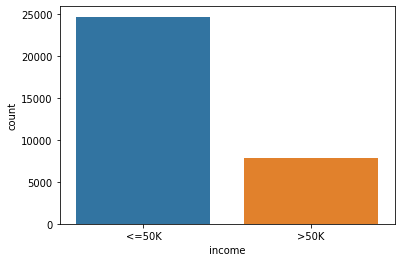

In [ ]:
sns.countplot(x=base_census['income'])

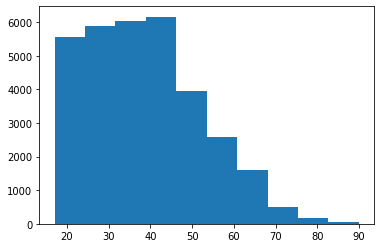

In [ ]:
plt.hist(x=base_census['age']);

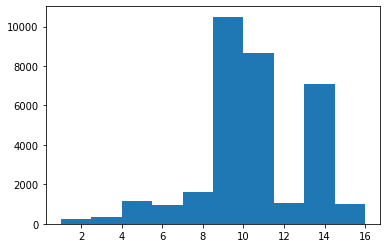

In [ ]:
plt.hist(x=base_census['education-num']);

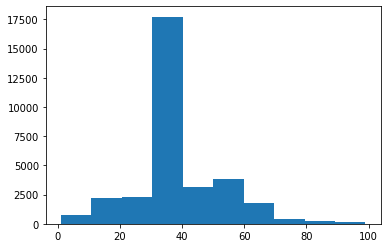

In [ ]:
plt.hist(x=base_census['hour-per-week']);

In [ ]:
#Graficos dinamicos
graph=ex.treemap(base_census,path=['workclass', 'age'])
graph.show()

In [ ]:
graph1 = ex.parallel_categories(base_census,dimensions=['occupation','race'])
graph1.show()

In [ ]:
graph1 = ex.parallel_categories(base_census,dimensions=['education','race', 'income'])
graph1.show()

##Divisão entre previsores e classe


In [ ]:
X_census = base_census.iloc[:,0:14].values

In [ ]:
X_census

array([[39, 'State-gov', 77516, ..., 0, 40, 'United-States'],
       [50, 'Self-emp-not-inc', 83311, ..., 0, 13, 'United-States'],
       [38, 'Private', 215646, ..., 0, 40, 'United-States'],
       ...,
       [58, 'Private', 151910, ..., 0, 40, 'United-States'],
       [22, 'Private', 201490, ..., 0, 20, 'United-States'],
       [52, 'Self-emp-inc', 287927, ..., 0, 40, 'United-States']],
      dtype=object)

In [ ]:
Y_census = base_census.iloc[:,14]

In [ ]:
Y_census

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 32561, dtype: object

In [ ]:
#Para variaveis String
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Cria objeto
label_encoder_test = LabelEncoder()

In [ ]:
#Converter String em numero
X_census[:,1]

array(['State-gov', 'Self-emp-not-inc', 'Private', ..., 'Private',
       'Private', 'Self-emp-inc'], dtype=object)

In [ ]:
converted = label_encoder_test.fit_transform(X_census[:,1])

In [ ]:
converted

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
#Convertendo todos
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_ocuppation = LabelEncoder()
label_encoder_marital_status = LabelEncoder()
label_encoder_native = LabelEncoder()
label_encoder_relationship = LabelEncoder()

In [ ]:
#Converted
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital_status.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_ocuppation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_native.fit_transform(X_census[:,13])

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
np.unique(base_census['workclass'])

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

## OneHotEncoder

utilizado para corrigir a diferença de pesos que o ML da
por exemplo o atributo 0 é menos importante que o atributo 14, isso nao deve acontecer


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#[1,3,4,6,7,8,9,13] -> Colunas dos Atributos Categoricos
#passtrough -> Para ele nao excluir as colunas nao cistadas
onehotenconder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,4,6,7,8,9,13])], remainder='passthrough')

In [ ]:
X_census = onehotenconder_census.fit_transform(X_census).toarray()

In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

## Escalonamento de Valores 

Colocar os valores na mesma escala

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

## Divisão das Bases em Treinamentos e TEste

In [ ]:
from sklearn.model_selection import train_test_split

## Data Credit

In [ ]:
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, Y_credit, test_size=0.25, random_state = 0)

In [ ]:
X_credit_train.shape

(24435, 3)

In [ ]:
y_credit_train.shape

(24435,)

## Data Census

In [ ]:
X_census_train, X_census_test, y_census_train, y_census_test = train_test_split(X_census, Y_census, test_size=0.15, random_state = 0)

In [ ]:
X_census_train.shape, y_census_train.shape

((27676, 117), (27676,))

In [ ]:
X_census_test.shape, y_census_test.shape

((4885, 117), (4885,))

##Salvar as base de dados

In [ ]:
##Biblioteca para salvar em disco
import pickle 

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_train, y_credit_train, X_credit_test, y_credit_test], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_train, y_census_train, X_census_test, y_census_test], f)